Example has been taken from Deep Graph Library's repository (https://docs.dgl.ai/index.html)

# Model definition

In [1]:
# deepgraph library on cora dataset as template
import pandas as pd
import dgl
import dgl.function as fn
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph

# prepare GCN
gcn_msg = fn.copy_src(src='h', out='m')
gcn_reduce = fn.sum(msg='m', out='h')

class NodeApplyModule(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}
    
class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        g.ndata['h'] = feature
        g.update_all(gcn_msg, gcn_reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')
    
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.gcn1 = GCN(1433, 100, F.relu)
        self.gcn2 = GCN(100, 7, F.relu)

    def forward(self, g, features):
        x = self.gcn1(g, features)
        x = self.gcn2(g, x)
        return x
net = Net()
print(net)

Net(
  (gcn1): GCN(
    (apply_mod): NodeApplyModule(
      (linear): Linear(in_features=1433, out_features=100, bias=True)
    )
  )
  (gcn2): GCN(
    (apply_mod): NodeApplyModule(
      (linear): Linear(in_features=100, out_features=7, bias=True)
    )
  )
)


# Load Cora dataset

In [2]:
from dgl.data import citation_graph as citegrh
def load_cora_data():
    data = citegrh.load_cora()
    features = th.FloatTensor(data.features)
    labels = th.LongTensor(data.labels)
    mask = th.ByteTensor(data.train_mask)
    g = DGLGraph(data.graph)
    return g, features, labels, mask

# Training

In [3]:
import time
import numpy as np
g, features, labels, mask = load_cora_data()
optimizer = th.optim.Adam(net.parameters(), lr=1e-3)
dur = []
embedding_representation = []
for epoch in range(1000):
    if epoch >=3:
        t0 = time.time()

    logits = net(g, features)
    if epoch % 100 == 0:
        embedding_representation.append(logits)
    
    
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[mask], labels[mask])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch >=3:
        dur.append(time.time() - t0)

    print("Epoch {:05d} | Loss {:.4f} | Time(s) {:.4f}".format(
            epoch, loss.item(), np.mean(dur)))

C:\Users\monir.zaman\AppData\Local\Continuum\anaconda3\lib\site-packages\dgl\base.py:18: UserWarning: Initializer is not set. Use zero initializer instead. To suppress this warning, use `set_initializer` to explicitly specify which initializer to use.
  warnings.warn(msg)
C:\Users\monir.zaman\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\monir.zaman\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 00000 | Loss 1.9275 | Time(s) nan
Epoch 00001 | Loss 1.8950 | Time(s) nan
Epoch 00002 | Loss 1.8673 | Time(s) nan
Epoch 00003 | Loss 1.8390 | Time(s) 0.4540
Epoch 00004 | Loss 1.8094 | Time(s) 0.4480
Epoch 00005 | Loss 1.7793 | Time(s) 0.4503
Epoch 00006 | Loss 1.7482 | Time(s) 0.4465
Epoch 00007 | Loss 1.7161 | Time(s) 0.4474
Epoch 00008 | Loss 1.6844 | Time(s) 0.4452
Epoch 00009 | Loss 1.6536 | Time(s) 0.4439
Epoch 00010 | Loss 1.6233 | Time(s) 0.4423
Epoch 00011 | Loss 1.5935 | Time(s) 0.4432
Epoch 00012 | Loss 1.5644 | Time(s) 0.4428
Epoch 00013 | Loss 1.5366 | Time(s) 0.4422
Epoch 00014 | Loss 1.5100 | Time(s) 0.4415
Epoch 00015 | Loss 1.4844 | Time(s) 0.4398
Epoch 00016 | Loss 1.4597 | Time(s) 0.4391
Epoch 00017 | Loss 1.4361 | Time(s) 0.4381
Epoch 00018 | Loss 1.4135 | Time(s) 0.4375
Epoch 00019 | Loss 1.3917 | Time(s) 0.4359
Epoch 00020 | Loss 1.3708 | Time(s) 0.4344
Epoch 00021 | Loss 1.3506 | Time(s) 0.4332
Epoch 00022 | Loss 1.3312 | Time(s) 0.4328
Epoch 00023 | Loss 1

Epoch 00191 | Loss 0.6559 | Time(s) 0.4219
Epoch 00192 | Loss 0.6554 | Time(s) 0.4226
Epoch 00193 | Loss 0.6549 | Time(s) 0.4233
Epoch 00194 | Loss 0.6545 | Time(s) 0.4239
Epoch 00195 | Loss 0.6540 | Time(s) 0.4246
Epoch 00196 | Loss 0.6535 | Time(s) 0.4250
Epoch 00197 | Loss 0.6530 | Time(s) 0.4256
Epoch 00198 | Loss 0.6526 | Time(s) 0.4261
Epoch 00199 | Loss 0.6521 | Time(s) 0.4267
Epoch 00200 | Loss 0.6517 | Time(s) 0.4271
Epoch 00201 | Loss 0.6512 | Time(s) 0.4275
Epoch 00202 | Loss 0.6508 | Time(s) 0.4280
Epoch 00203 | Loss 0.6504 | Time(s) 0.4286
Epoch 00204 | Loss 0.6499 | Time(s) 0.4291
Epoch 00205 | Loss 0.6495 | Time(s) 0.4296
Epoch 00206 | Loss 0.6491 | Time(s) 0.4300
Epoch 00207 | Loss 0.6487 | Time(s) 0.4303
Epoch 00208 | Loss 0.6483 | Time(s) 0.4305
Epoch 00209 | Loss 0.6479 | Time(s) 0.4307
Epoch 00210 | Loss 0.6475 | Time(s) 0.4311
Epoch 00211 | Loss 0.6471 | Time(s) 0.4312
Epoch 00212 | Loss 0.6467 | Time(s) 0.4313
Epoch 00213 | Loss 0.6463 | Time(s) 0.4312
Epoch 00214

Epoch 00382 | Loss 0.6166 | Time(s) 0.4377
Epoch 00383 | Loss 0.6165 | Time(s) 0.4376
Epoch 00384 | Loss 0.6164 | Time(s) 0.4375
Epoch 00385 | Loss 0.6164 | Time(s) 0.4373
Epoch 00386 | Loss 0.6163 | Time(s) 0.4372
Epoch 00387 | Loss 0.6162 | Time(s) 0.4371
Epoch 00388 | Loss 0.6162 | Time(s) 0.4370
Epoch 00389 | Loss 0.6161 | Time(s) 0.4369
Epoch 00390 | Loss 0.6160 | Time(s) 0.4368
Epoch 00391 | Loss 0.6160 | Time(s) 0.4367
Epoch 00392 | Loss 0.6159 | Time(s) 0.4368
Epoch 00393 | Loss 0.6159 | Time(s) 0.4368
Epoch 00394 | Loss 0.6158 | Time(s) 0.4367
Epoch 00395 | Loss 0.6157 | Time(s) 0.4367
Epoch 00396 | Loss 0.6157 | Time(s) 0.4365
Epoch 00397 | Loss 0.6156 | Time(s) 0.4364
Epoch 00398 | Loss 0.6156 | Time(s) 0.4363
Epoch 00399 | Loss 0.6155 | Time(s) 0.4362
Epoch 00400 | Loss 0.6155 | Time(s) 0.4361
Epoch 00401 | Loss 0.6154 | Time(s) 0.4360
Epoch 00402 | Loss 0.6154 | Time(s) 0.4359
Epoch 00403 | Loss 0.6154 | Time(s) 0.4359
Epoch 00404 | Loss 0.6153 | Time(s) 0.4360
Epoch 00405

Epoch 00573 | Loss 0.6102 | Time(s) 0.4431
Epoch 00574 | Loss 0.6102 | Time(s) 0.4432
Epoch 00575 | Loss 0.6102 | Time(s) 0.4432
Epoch 00576 | Loss 0.6102 | Time(s) 0.4432
Epoch 00577 | Loss 0.6101 | Time(s) 0.4432
Epoch 00578 | Loss 0.6101 | Time(s) 0.4432
Epoch 00579 | Loss 0.6101 | Time(s) 0.4432
Epoch 00580 | Loss 0.6101 | Time(s) 0.4432
Epoch 00581 | Loss 0.6101 | Time(s) 0.4432
Epoch 00582 | Loss 0.6101 | Time(s) 0.4432
Epoch 00583 | Loss 0.6101 | Time(s) 0.4432
Epoch 00584 | Loss 0.6100 | Time(s) 0.4431
Epoch 00585 | Loss 0.6100 | Time(s) 0.4431
Epoch 00586 | Loss 0.6100 | Time(s) 0.4431
Epoch 00587 | Loss 0.6100 | Time(s) 0.4430
Epoch 00588 | Loss 0.6100 | Time(s) 0.4430
Epoch 00589 | Loss 0.6100 | Time(s) 0.4430
Epoch 00590 | Loss 0.6100 | Time(s) 0.4429
Epoch 00591 | Loss 0.6100 | Time(s) 0.4429
Epoch 00592 | Loss 0.6099 | Time(s) 0.4429
Epoch 00593 | Loss 0.6099 | Time(s) 0.4428
Epoch 00594 | Loss 0.6099 | Time(s) 0.4428
Epoch 00595 | Loss 0.6099 | Time(s) 0.4427
Epoch 00596

Epoch 00764 | Loss 0.6084 | Time(s) 0.4559
Epoch 00765 | Loss 0.6084 | Time(s) 0.4558
Epoch 00766 | Loss 0.6084 | Time(s) 0.4558
Epoch 00767 | Loss 0.6084 | Time(s) 0.4557
Epoch 00768 | Loss 0.6084 | Time(s) 0.4556
Epoch 00769 | Loss 0.6084 | Time(s) 0.4556
Epoch 00770 | Loss 0.6084 | Time(s) 0.4555
Epoch 00771 | Loss 0.6084 | Time(s) 0.4555
Epoch 00772 | Loss 0.6084 | Time(s) 0.4554
Epoch 00773 | Loss 0.6084 | Time(s) 0.4553
Epoch 00774 | Loss 0.6084 | Time(s) 0.4553
Epoch 00775 | Loss 0.6083 | Time(s) 0.4552
Epoch 00776 | Loss 0.6083 | Time(s) 0.4551
Epoch 00777 | Loss 0.6083 | Time(s) 0.4551
Epoch 00778 | Loss 0.6083 | Time(s) 0.4550
Epoch 00779 | Loss 0.6083 | Time(s) 0.4550
Epoch 00780 | Loss 0.6083 | Time(s) 0.4549
Epoch 00781 | Loss 0.6083 | Time(s) 0.4548
Epoch 00782 | Loss 0.6083 | Time(s) 0.4548
Epoch 00783 | Loss 0.6083 | Time(s) 0.4547
Epoch 00784 | Loss 0.6083 | Time(s) 0.4547
Epoch 00785 | Loss 0.6083 | Time(s) 0.4546
Epoch 00786 | Loss 0.6083 | Time(s) 0.4545
Epoch 00787

Epoch 00955 | Loss 0.6076 | Time(s) 0.4511
Epoch 00956 | Loss 0.6076 | Time(s) 0.4511
Epoch 00957 | Loss 0.6076 | Time(s) 0.4510
Epoch 00958 | Loss 0.6076 | Time(s) 0.4509
Epoch 00959 | Loss 0.6076 | Time(s) 0.4508
Epoch 00960 | Loss 0.6076 | Time(s) 0.4508
Epoch 00961 | Loss 0.6076 | Time(s) 0.4507
Epoch 00962 | Loss 0.6076 | Time(s) 0.4506
Epoch 00963 | Loss 0.6076 | Time(s) 0.4506
Epoch 00964 | Loss 0.6076 | Time(s) 0.4505
Epoch 00965 | Loss 0.6076 | Time(s) 0.4504
Epoch 00966 | Loss 0.6076 | Time(s) 0.4503
Epoch 00967 | Loss 0.6076 | Time(s) 0.4502
Epoch 00968 | Loss 0.6076 | Time(s) 0.4502
Epoch 00969 | Loss 0.6076 | Time(s) 0.4501
Epoch 00970 | Loss 0.6076 | Time(s) 0.4500
Epoch 00971 | Loss 0.6076 | Time(s) 0.4499
Epoch 00972 | Loss 0.6076 | Time(s) 0.4499
Epoch 00973 | Loss 0.6076 | Time(s) 0.4498
Epoch 00974 | Loss 0.6076 | Time(s) 0.4497
Epoch 00975 | Loss 0.6076 | Time(s) 0.4497
Epoch 00976 | Loss 0.6076 | Time(s) 0.4496
Epoch 00977 | Loss 0.6076 | Time(s) 0.4495
Epoch 00978

# Visualizing Embedding

In [4]:
ith_rep = len(embedding_representation) - 1
X = embedding_representation[ith_rep].tolist()
X = np.array(X).reshape(len(X), len(X[0]))

#scaling
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors

from sklearn.manifold import TSNE

#scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)


model = TSNE(learning_rate=10,
             init='random',
             random_state=None, 
             perplexity=49,
             n_iter=5000,
             n_iter_without_progress=30,
             min_grad_norm=1e-07,
             method='barnes_hut',
             angle=0.5,
             early_exaggeration=4.0,
             metric='euclidean',
             verbose=1
            )
tc = model.fit_transform(X)

[t-SNE] Computing 148 nearest neighbors...
[t-SNE] Indexed 2708 samples in 0.007s...
[t-SNE] Computed neighbors for 2708 samples in 0.145s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2708
[t-SNE] Computed conditional probabilities for sample 2000 / 2708
[t-SNE] Computed conditional probabilities for sample 2708 / 2708
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 12.568996
[t-SNE] Error after 3950 iterations: 0.630701


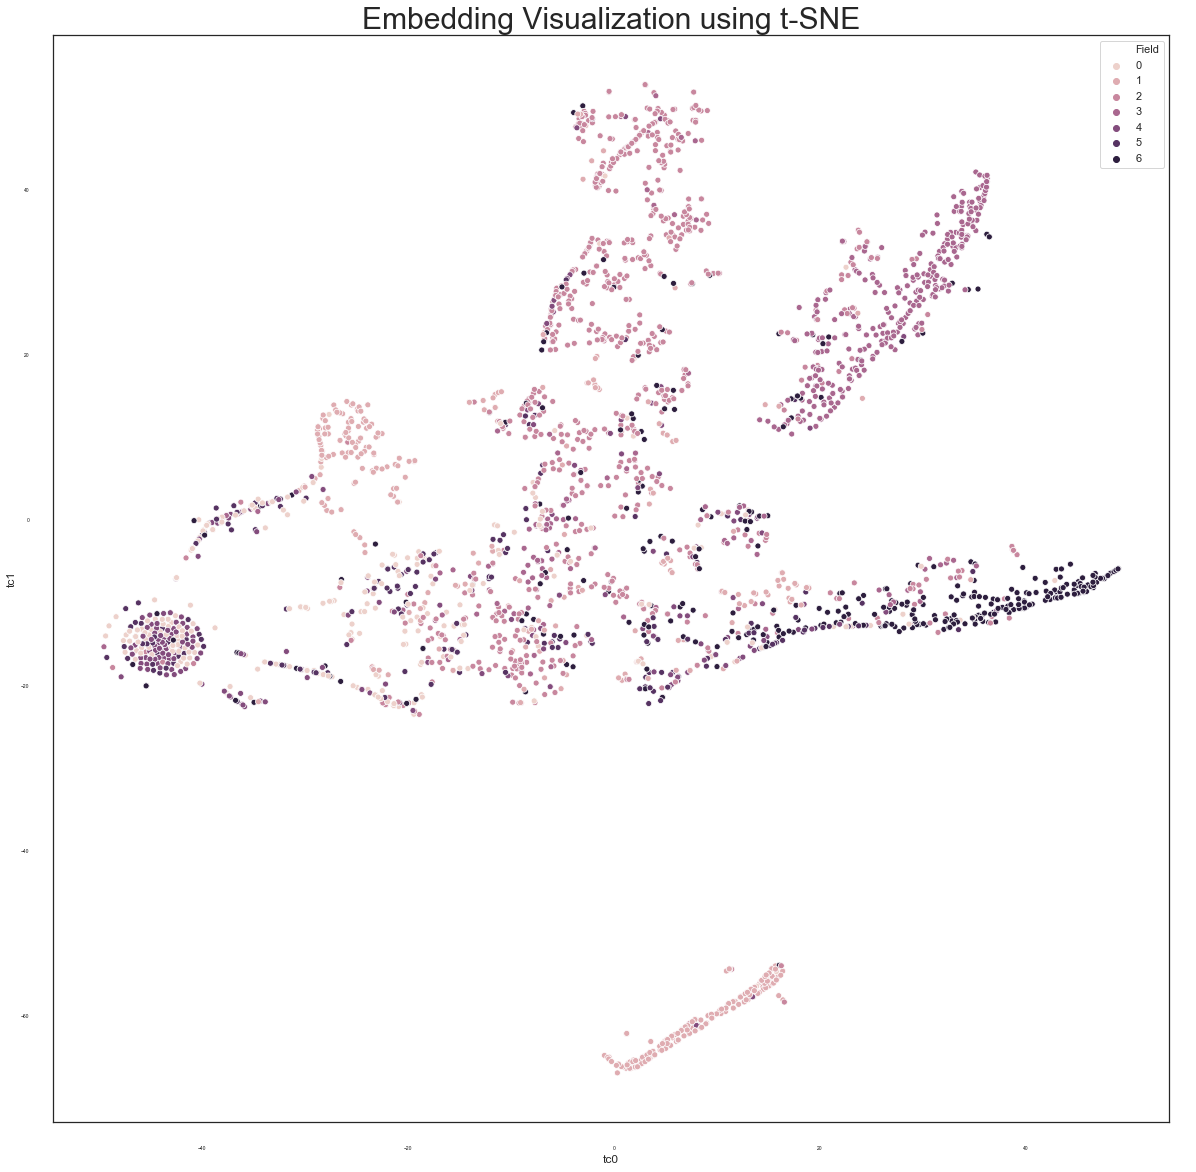

In [5]:
tc0 = tc[:,0]
tc1 = tc[:,1]

rdf = pd.DataFrame({'tc0': tc0, 'tc1': tc1, 'Field': labels.tolist()})

sns.set(rc={"figure.figsize": (20, 20)})
sns.set_style("white")
sns.scatterplot(x='tc0', 
                y='tc1', 
                hue='Field', 
                data=rdf,
                legend='full'
                )

plt.title('Embedding Visualization using t-SNE', size=30);
plt.tick_params(direction='out', length=20, width=20, colors='k')
plt.tick_params(axis='both', which='major', labelsize=5)
plt.grid(True, which='major', axis='y', color="white", linewidth=1, zorder=1)
plt.show()